In [1]:
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
with open('/Users/seankalejs/PycharmProjects/For Vera/reviews_analysis/mvl_reviews.txt', encoding="ISO-8859-1") as f:
    doc = f.read()
    doc = nlp(doc)

In [3]:
df = pd.DataFrame(columns=['noun', 'adj', 'value'])

for token in doc:
    if token.pos_ == 'NOUN' and any(child.pos_ == 'ADJ' for child in token.children):
        iterator = 1
        for chld in token.children:
            if chld.pos_ == ('ADJ' or 'ADV'):
                df.loc[len(df.index)] = [token.lemma_, chld.lemma_, iterator]


In [4]:
duplicated = df[df.duplicated()]

for index, row in df.iterrows():
    iterator = 1
    for indexs, rows in duplicated.iterrows():
        if row['noun'] == rows['noun'] and row['adj'] == rows['adj']:
            iterator += 1
    row['value'] = iterator

dff = df.drop_duplicates(subset=['noun', 'adj'])

In [5]:
dataset_final = pd.DataFrame(columns=['noun', 'adj', 'value'])

for index, row in dff.iterrows():
    if row['value'] > 1:
        dataset_final.loc[len(dataset_final.index)] = [row['noun'], row['adj'], row['value']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


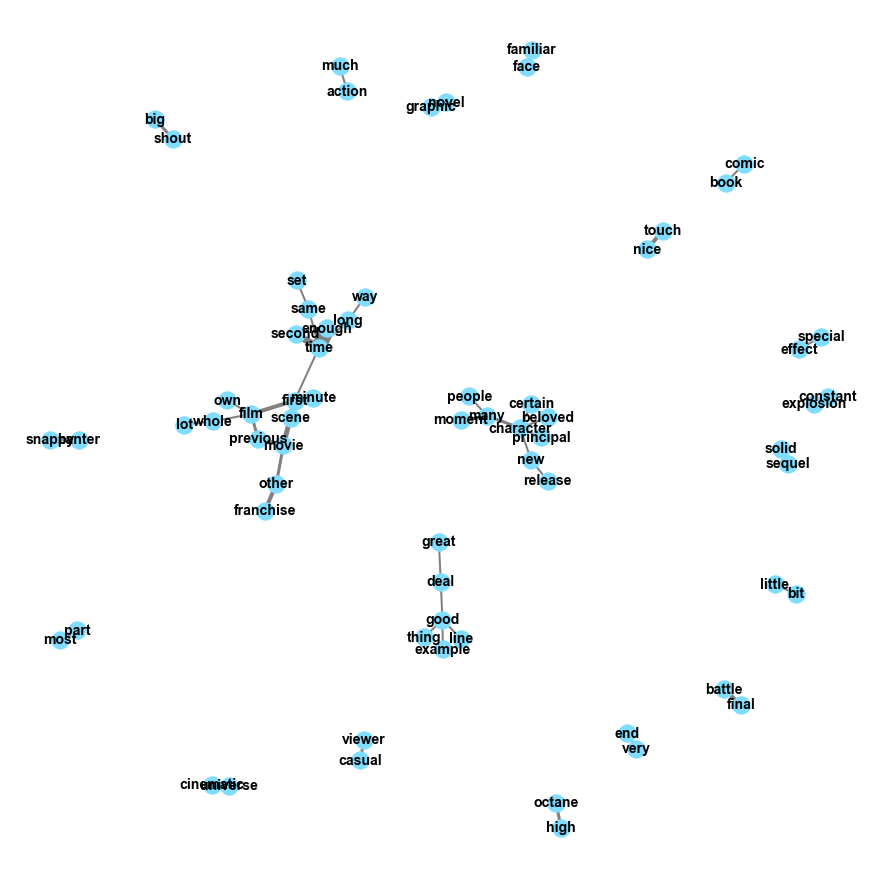

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,12)
graph = nx.from_pandas_edgelist(dataset_final, source='noun', target='adj')
nx.draw(graph, width=dataset_final['value'], with_labels=True, font_size=14, font_weight=700, edge_color='#808080', node_color='#80ddff')
plt.savefig('/Users/seankalejs/PycharmProjects/For Vera/reviews_analysis/fig_all.png')

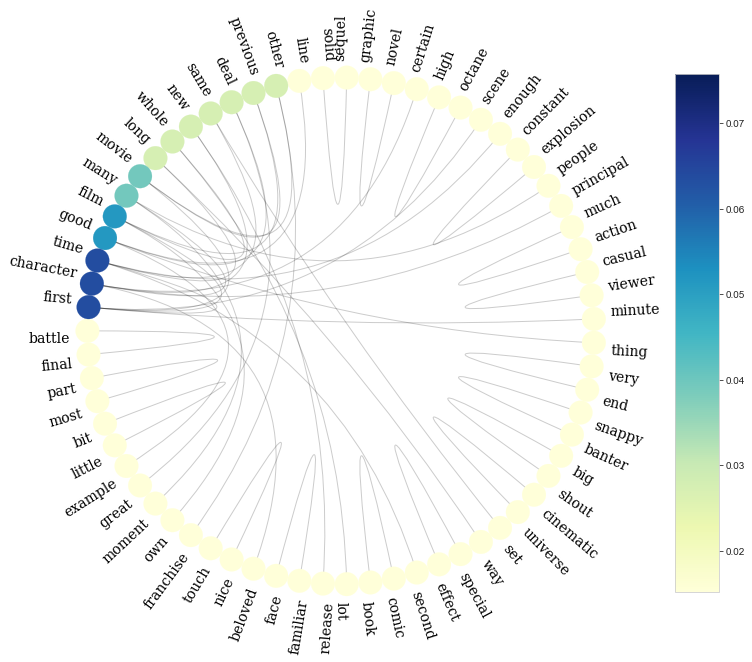

In [7]:
deg_cen = nx.degree_centrality(graph)
for node in graph.nodes():
    graph.nodes[node]['centrality'] = deg_cen[node]

import nxviz as nv
c = nv.CircosPlot(graph, node_labels=True, node_label_layout="rotation", node_color='centrality', node_order='centrality', figsize=(12,12), fontsize=14)
c.draw()
plt.savefig('/Users/seankalejs/PycharmProjects/For Vera/reviews_analysis/fig_round_all.png')

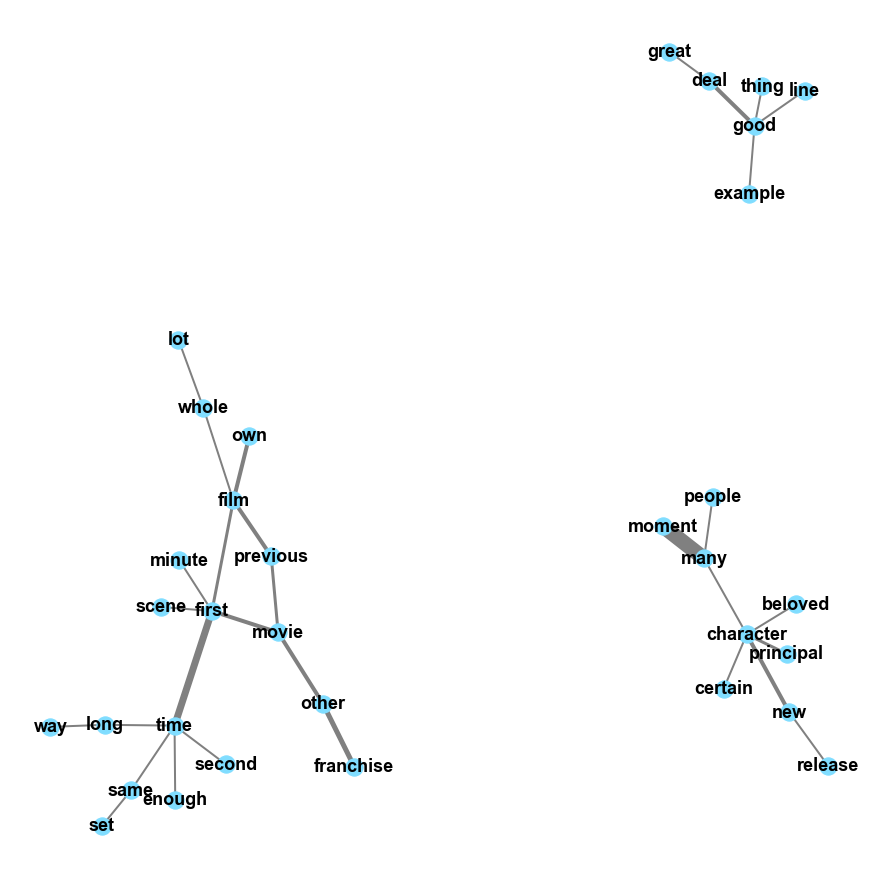

In [8]:
for component in list(nx.connected_components(graph)):
    if len(component)<5:
        for node in component:
            graph.remove_node(node)

nx.draw(graph, width=dataset_final['value'], with_labels=True, font_size=18, font_weight=1000, edge_color='#808080', node_color='#80ddff')
plt.savefig('/Users/seankalejs/PycharmProjects/For Vera/reviews_analysis/fig_main.png')